<a href="https://colab.research.google.com/github/thangamani21/NM-Project/blob/main/Houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
!pip install gradio

# (Optional) Update scikit-learn to the latest version
!pip install -U scikit-learn

# Install pandas and numpy (usually pre-installed)
!pip install pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.5 MB/s eta 0:00:00


Saving Housing.csv to Housing.csv
First 5 rows:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Shape: (545, 13)
<class 'pandas.core.frame.DataFr

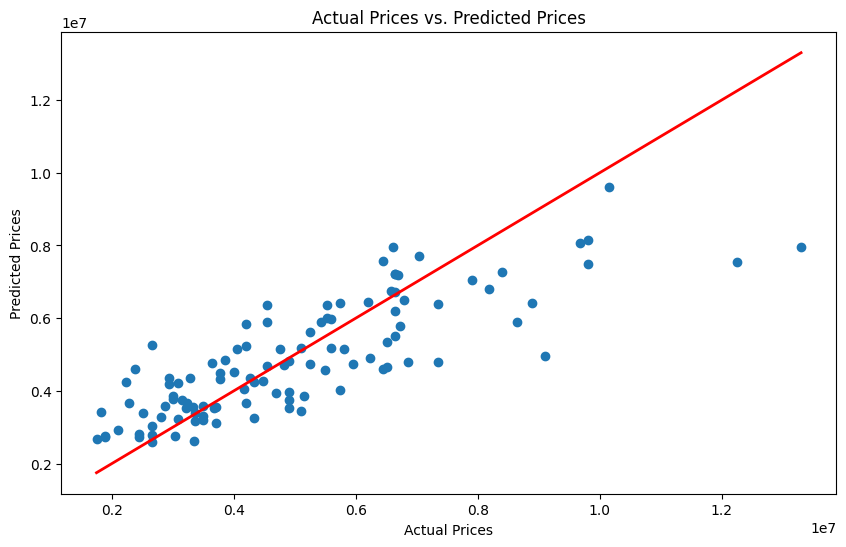

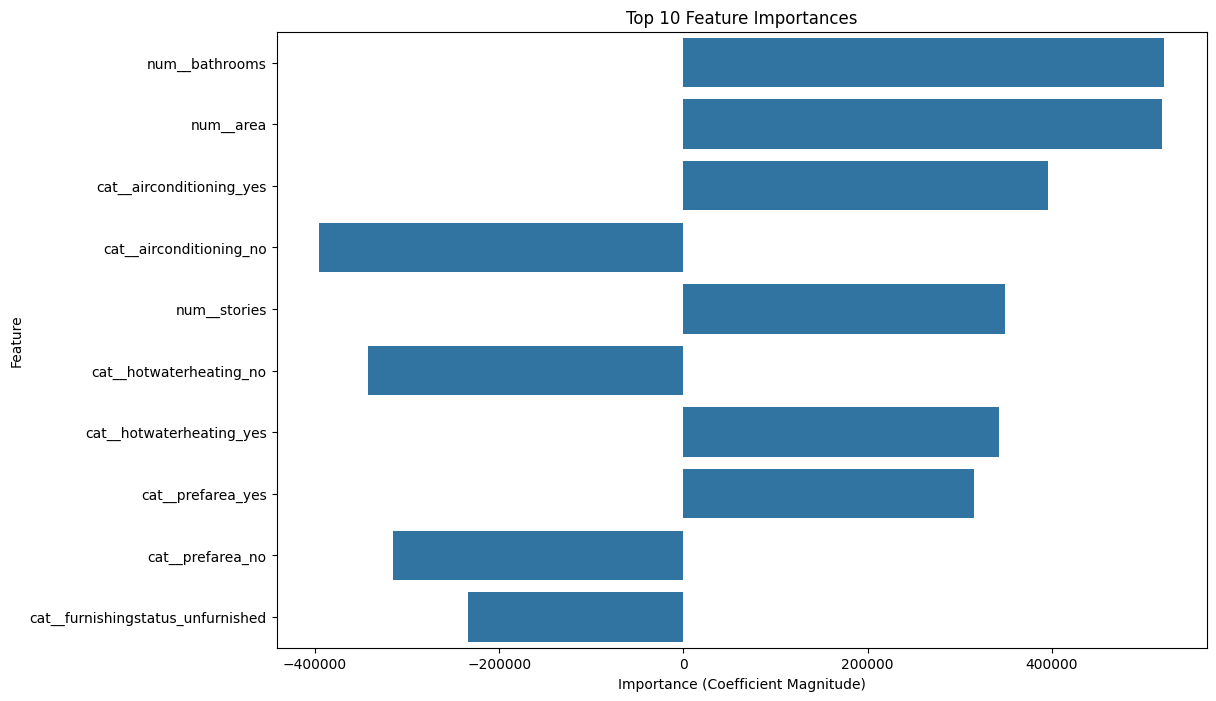

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cedd1762941511196a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import gradio as gr

# 1. Load the Dataset
try:
    from google.colab import files
    uploaded = files.upload()

    # STEP 2: Load CSV into pandas DataFrame
    import pandas as pd

    filename = list(uploaded.keys())[0]  # Get uploaded filename
    df = pd.read_csv(filename)

except Exception as e:
    print(f"Error loading the dataset: {e}")
    print("Please ensure the file is uploaded correctly and is a valid CSV file.")
    exit()

# 2. Data Exploration
print("First 5 rows:\n", df.head())
print("\nShape:", df.shape)
print("\nData types and missing values:\n", df.info())
print("\nSummary statistics:\n", df.describe())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Handle missing values (example: impute with mean)
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):  # Correct numeric check
            df[col] = df[col].fillna(df[col].mean())  # numerical columns
        else:
            print(f"Warning: Column '{col}' has missing values and is not numeric.  Consider imputation or other handling.")

# 3. Identify Target and Features
if 'price' in df.columns:
    target = 'price'
    features = df.columns.drop(target)
    print("\nFeatures:", features)
else:
    print("Error: The 'price' column is missing. Please check your dataset.")
    exit()

# 4. Preprocessing
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.drop(target)

print("\nCategorical columns:", categorical_cols)
print("\nNumerical columns:", numerical_cols)

# Create a column transformer for preprocessing
transformers = []

if len(numerical_cols) > 0:
    transformers.append(('num', StandardScaler(), numerical_cols))
if len(categorical_cols) > 0:
    transformers.append(('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols))

preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')

# Split data
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data
try:
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
except Exception as e:
    print(f"Error during preprocessing: {e}")
    exit()

# 5. Model Building
model = LinearRegression()
try:
    model.fit(X_train, y_train)
except Exception as e:
    print(f"Error during model training: {e}")
    exit()

# 6. Evaluation
try:
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\nMSE:", mse)
    print("R² Score:", r2)

    # --- Plotting starts here ---
    # 1. Predicted vs. Actual Values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual Prices vs. Predicted Prices")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', linewidth=2)  # Diagonal line for reference
    plt.show()

    # 2. Feature Importances (if applicable - only for linear models)
    if hasattr(model, 'coef_'):
        coefficients = model.coef_
        feature_names = preprocessor.get_feature_names_out()  # Get feature names after preprocessing

        # Create a DataFrame for feature importances
        feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
        feature_importances['Abs_Importance'] = np.abs(feature_importances['Importance'])
        feature_importances = feature_importances.sort_values('Abs_Importance', ascending=False)

        # Plot feature importances
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))  # Show top 10
        plt.title('Top 10 Feature Importances')
        plt.xlabel('Importance (Coefficient Magnitude)')
        plt.ylabel('Feature')
        plt.show()
    else:
        print("Warning: Feature importance plotting is not available for this model type.")
    # --- Plotting ends here ---

except Exception as e:
    print(f"Error during model evaluation or plotting: {e}")

# 7. Prediction Function for Gradio
def predict_price(area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus): # MUST match gradio input
    try:
        # ----------------------- CUSTOMIZE THIS SECTION -----------------------
        # Create a dictionary mapping feature names to their values
        feature_values = {
            'area': float(area),
            'bedrooms': int(bedrooms),
            'bathrooms': float(bathrooms),
            'stories': int(stories),
            'mainroad': mainroad,
            'guestroom': guestroom,
            'basement': basement,
            'hotwaterheating': hotwaterheating,
            'airconditioning': airconditioning,
            'parking': int(parking),
            'prefarea': prefarea,
            'furnishingstatus': furnishingstatus
        }

        # ----------------------- END CUSTOMIZATION -----------------------
        print("Feature values:", feature_values)  # Debug

        input_df = pd.DataFrame([feature_values])
        input_transformed = preprocessor.transform(input_df)
        prediction = model.predict(input_transformed)

        return round(prediction[0], 2)

    except Exception as e:
        print(f"Error during prediction: {e}")
        return f"Error during prediction: {e}"

# 8. Gradio Interface
# ----------------------- CUSTOMIZE THIS SECTION -----------------------
input_components = [
    gr.Number(label="area"),
    gr.Number(label="bedrooms"),
    gr.Number(label="bathrooms"),
    gr.Number(label="stories"),
    gr.Dropdown(["yes", "no"], label="mainroad"),
    gr.Dropdown(["yes", "no"], label="guestroom"),
    gr.Dropdown(["yes", "no"], label="basement"),
    gr.Dropdown(["yes", "no"], label="hotwaterheating"),
    gr.Dropdown(["yes", "no"], label="airconditioning"),
    gr.Number(label="parking"),
    gr.Dropdown(["yes", "no"], label="prefarea"),
    gr.Dropdown(["furnished", "unfurnished", "semi-furnished"], label="furnishingstatus")  # Adapt to your data!
]
# ----------------------- END CUSTOMIZATION -----------------------

output = gr.Number(label="Predicted House Price")

interface = gr.Interface(
    fn=predict_price,
    inputs=input_components,
    outputs=output,
    title="Forecasting House Prices Accurately Using Smart Regression Techniques in Data Science",
    description="Enter house features to predict its price."
)

interface.launch(share=True)